# Assignment 2

In [1]:
#install.packages("rjags")

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


## problem 1

Compare two different hyperprior formulations for the binomial hierarchical model of Lesson 3.2: Hierarchical Modeling Fundamentals.

**(a)** first prior formulation was  
$$
\begin{aligned}
\theta_j\mid&\alpha,\beta \sim \operatorname{Beta}(\alpha,\beta) \\
&\alpha,\beta \sim \operatorname{iid} \space\operatorname{Expon}(0.001)
\end{aligned}
$$

**(a)(i)** Simulate 1000 pairs $(\alpha,\beta)$ from the hyperprior, and produce a scatterplot of $\beta$ versus $\alpha$.

Now produce a scatterplot of $\beta$ versus $\alpha$.

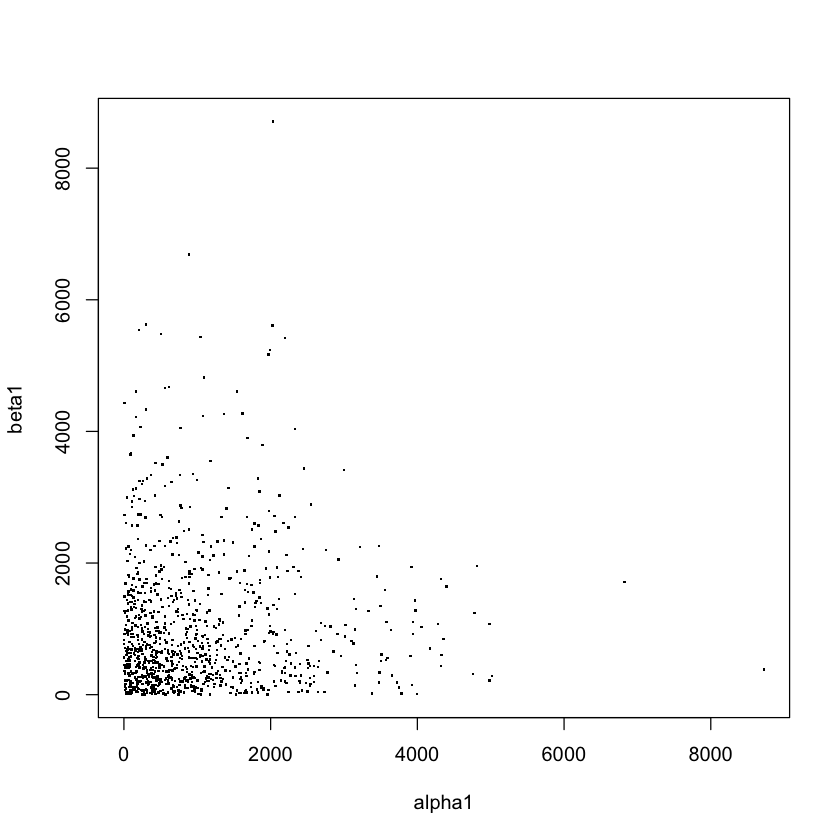

In [17]:
alpha1 <- rexp(n = 1000, rate =0.001)
beta1 <- rexp(n = 1000, rate =0.001)
plot(alpha1, beta1, pch=".", cex=2)

**(a)(ii)** Now let $\alpha = \beta = 700$, plot the (conditional prior) density of $\theta_j$.  
In this case,
$$
\begin{aligned}
{p}(\theta_j\mid\alpha,\beta) &\sim \operatorname{Beta}(\alpha = 700,\beta = 700)
\end{aligned}
$$



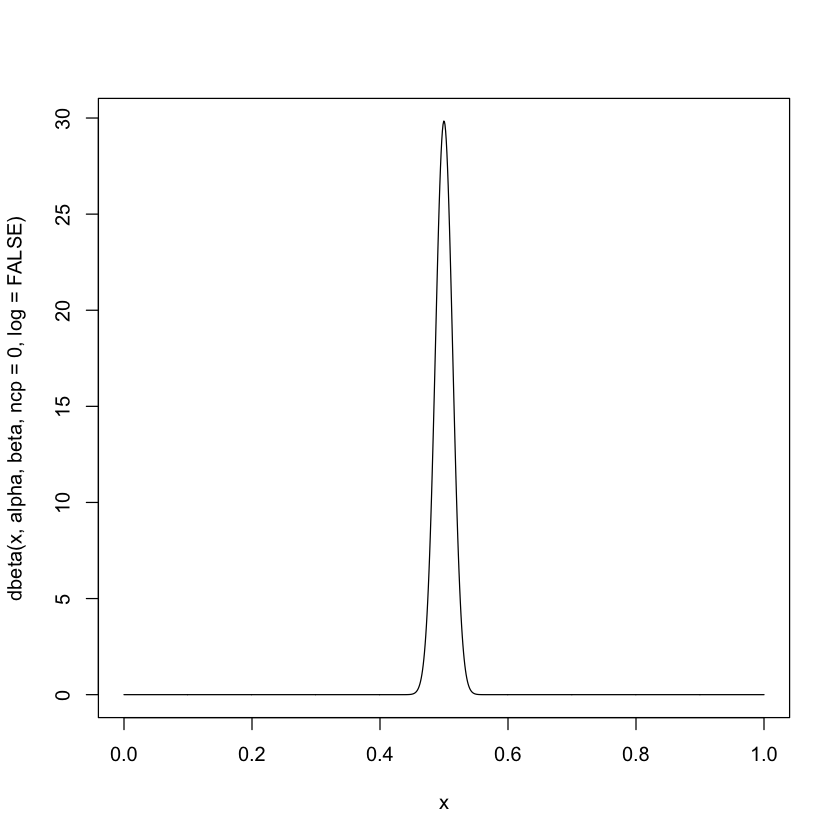

In [14]:
alpha<-700
beta<-700
curve(dbeta(x, alpha, beta, ncp = 0, log = FALSE),0, 1, n=1000)

**(b)** second prior formulation was
$$
\begin{aligned}
\theta_j\mid\alpha,\beta \sim \operatorname{Beta}(\alpha,\beta) \\
\alpha = \frac{\phi_1}{\phi_2^2} \quad \beta = \frac{1-\phi_1}{\phi_2^2}\\
\phi_1\sim\operatorname{U}(0,1)\quad \phi_2 \sim\operatorname{U}(0,1000)
\end{aligned}
$$

**(b)(i)** Now produce a scatterplot of $\beta$ versus $\alpha$.

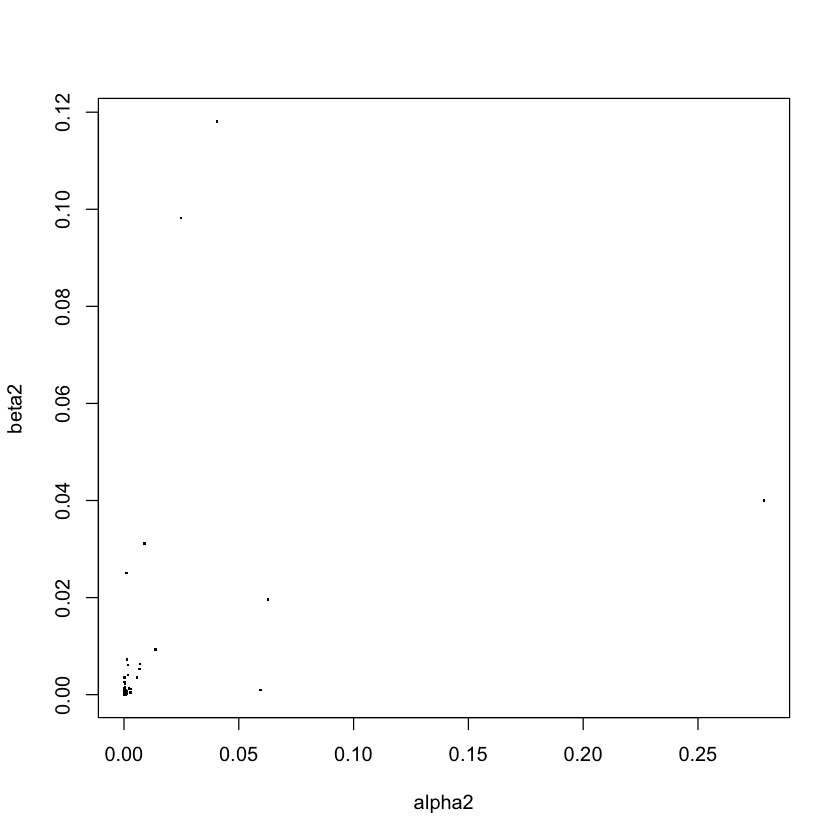

In [19]:
phi1<-runif(1000, min = 0, max = 1)
phi2<-runif(1000, min = 0, max = 1000)
alpha2=phi1/phi2^2
beta2=(1-phi1)/phi2^2
plot(alpha2, beta2, pch=".", cex=2)

**(b)(ii)** Now let $\alpha = \beta = 0.000002$, plot the (conditional prior) density of $\theta_j$.  
In this case,
$$
\begin{aligned}
{p}(\theta_j\mid\alpha,\beta) &\sim \operatorname{Beta}(\alpha = 0.000002,\beta = 0.000002)
\end{aligned}
$$

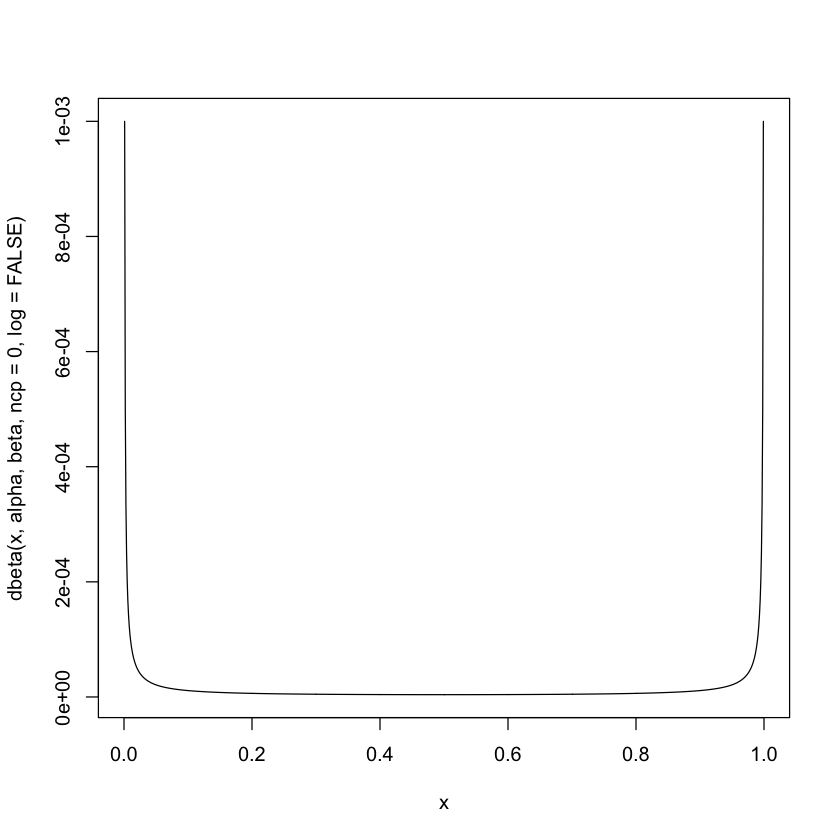

In [20]:
alpha<-0.000002
beta<-0.000002
curve(dbeta(x, alpha, beta, ncp = 0, log = FALSE),0, 1, n=1000)

## problem2

Bayesian hierarchical model in this case:  
$$
\begin{aligned}
\hat\psi_j \mid\psi_j \sim \operatorname{indep.}\space \operatorname{N}(\psi_j,\sigma_j^2) \quad j=1,...,12\\
\psi_j \mid\psi_0,\sigma_0^2 \sim \operatorname{iid}\space \operatorname{N}(\psi_0,\sigma_0^2) \quad j=1,...,12\\
\psi_0\sim\operatorname{N}(0,1000^2)\\
\sigma_0\sim\operatorname{U}(0,1000)
\end{aligned}
$$
with $\psi_0$ and $\sigma_0$ independent, and the values $\sigma_j^2, j = 1, . . . , 12$, regarded as fixed and known.

**(a)** The hyperparameters are:
$$
\begin{aligned}
\psi_0\sim\operatorname{N}(0,1000^2)\\
\sigma_0\sim\operatorname{U}(0,1000)
\end{aligned}
$$

**(b)** directed acyclic graph (DAG) for this model:

![title](DAG.png)

**(c)** completed asgn2template.bug and set up any R (rjags) statements appropriate for creating a JAGS model.

In [2]:
'model {
  for (j in 1:12) {
    psihat[j] ~ dnorm(psi[j], 1/sigma[j]^2)
    psi[j] ~ dnorm(psi0, 1/sigma0^2)
  }

  psi0 ~ dnorm(0,1/1000^2)
  sigma0 ~ dunif(0,1000)

  sigmasq0 <- sigma0^2
}

'
library(rjags)

[1] "model {\n  for (j in 1:12) {\n    psihat[j] ~ dnorm(psi[j], 1/sigma[j]^2)\n    psi[j] ~ dnorm(psi0, 1/sigma0^2)\n  }\n\n  psi0 ~ dnorm(0,1/1000^2)\n  sigma0 ~ dunif(0,1000)\n\n  sigmasq0 <- sigma0^2\n}\n\n"

Loading required package: coda
Linked to JAGS 4.3.0
Loaded modules: basemod,bugs


In [4]:
#load data
d <- read.table("data.txt", header=FALSE)
colnames(d) <- c("psi", "sigma")

In [5]:
d

psi,sigma
1.055,0.373
-0.097,0.116
0.626,0.229
0.017,0.117
1.068,0.471
-0.025,0.120
-0.117,0.220
-0.381,0.239
0.507,0.186
0.000,0.328


In [51]:
#install.packages("xtable")

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


**(d)** Using the JAGS model to produce posterior numerical summary and also graphical estimates of the posterior densities.  
the approximations of the posterior expected values, posterior standard deviations, and 95% central posterior intervals are showing below code and output in the end of this section: 

In [31]:
m1 <- jags.model("asgn2template.bug", d)

Compiling model graph
   Resolving undeclared variables
   Allocating nodes
Graph information:
   Observed stochastic nodes: 12
   Unobserved stochastic nodes: 14
   Total graph size: 70

Initializing model



In [32]:
update(m1, 10000) #Run at least 10,000 iterations of burn-in

In [34]:
#100,000 iterations to use for inference
x1 <- coda.samples(m1, c("psi0","sigmasq0","psi"), n.iter=100000) 

In [36]:
psi0<- as.matrix(x1)[,"psi0"]
sigmasq0<- as.matrix(x1)[,"sigmasq0"]

In [44]:
summary(psi0)
summary(sigmasq0)
psi0_mean=mean(psi0)
sigmasq0_mean=mean(sigmasq0)
psi0_sd=sd(psi0)
sigmasq0_sd=sd(sigmasq0)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
-0.7974  0.1887  0.2879  0.2879  0.3872  1.6583 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
0.05912 0.19107 0.25560 0.29809 0.35450 3.91334 

In [50]:
#the approximations of the posterior expected values
psi0_mean
sigmasq0_mean

#posterior standard deviations
psi0_sd
sigmasq0_sd

[1] 0.1584961

[1] 0.1702845

In [87]:
#Calculating a 95% Confidence Interval From a Normal Distribution

ci<-function(n,s,mean){
    
    error <- qnorm(0.975)*s/sqrt(n)
    left <- mean-error
    right <- mean+error
    ci<-list(left,right)
    return (ci)
}

psi0_ci=ci(100000,psi0_sd,psi0_mean)
sigmasq0_ci=ci(100000,sigmasq0_sd,sigmasq0_mean)

In [88]:
#posterior 95% central posterior intervals
psi0_ci
sigmasq0_ci

[[1]]
[1] 0.286887

[[2]]
[1] 0.2888517

[[1]]
[1] 0.2970373

[[2]]
[1] 0.2991481

Loading required package: lattice


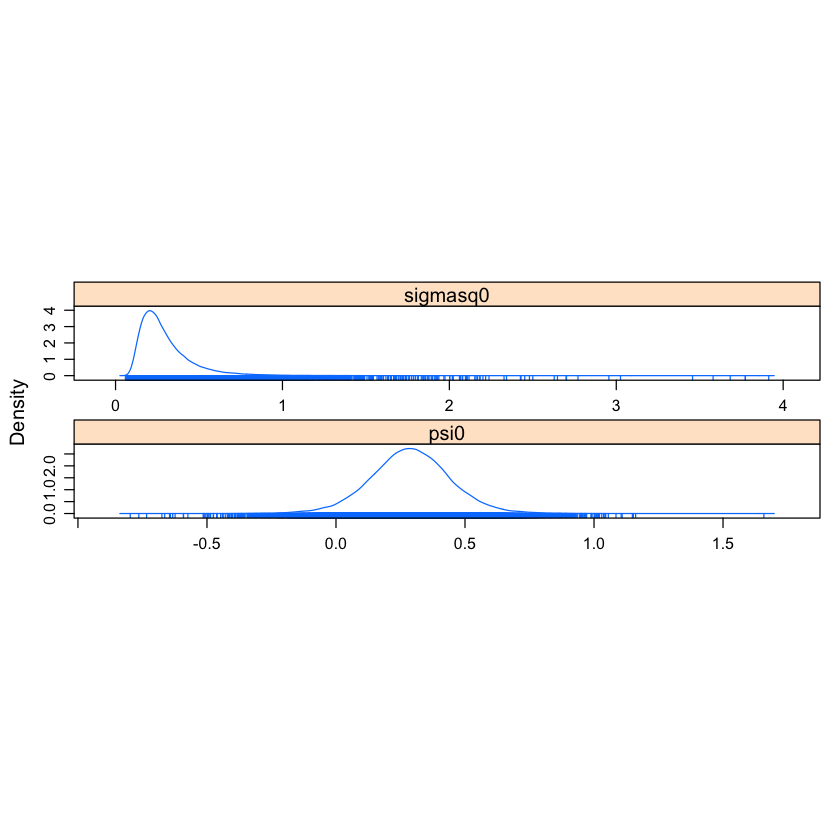

In [38]:
#graphical estimates of the posterior densities.
require(lattice)
densityplot(x1[,c("psi0","sigmasq0")])

In [96]:
posterior.expected.values<-c(psi0_mean,sigmasq0_mean)
posterior.standard.deviations<-c(psi0_sd,sigmasq0_sd)
CI<-rbind(psi0_ci,sigmasq0_ci)

In [104]:
summary = data.frame(posterior.expected.values, posterior.standard.deviations,CI)
row.names(summary) <- c('psi0','sigmasq0')
colnames(summary)<-c('posterior.expected.values','posterior.standard.deviations','95%CI.left','95%CI.right')

In [105]:
#the approximations of the posterior expected values, 
#posterior standard deviations, and 95% central posterior intervals.
summary 

,posterior.expected.values,posterior.standard.deviations,95%CI.left,95%CI.right
psi0,0.2878693,0.1584961,0.286887,0.2888517
sigmasq0,0.2980927,0.1702845,0.2970373,0.2991481


**(e)(i)** directed acyclic graph (DAG) for the new model:  
![title](DAG2.png)


**(e)(ii)** Estimate the posterior mean and posterior standard deviation, and form a 95% central posterior predictive interval for the estimated log-odds ratio that the new study will obtain.  
As the result showing below, **posterior mean value of new $\hat\psi$ is 0.28719, posterior standard deviation is 0.603, the 95% central posterior predictive interval for the estimated log-odds ratio is (0.283,0.291)**

In [55]:
#JAGS model for the new study case asgn2template_new2.bug
'
model {
  for (j in 1:12) {
    psihat[j] ~ dnorm(psi[j], 1/sigma[j]^2)
    psi[j] ~ dnorm(psi0, 1/sigma0^2)
  }

  psi_new ~ dnorm(psi0, 1/sigma0^2)
  psihat_new ~ dnorm(psi_new,1/sigma_new^2)
  sigma_new <- 0.2
  sigma_newsq <- sigma_new^2
  psi0 ~ dnorm(0,1/1000^2)
  sigma0 ~ dunif(0,1000)

  sigmasq0 <- sigma0^2
}
'


[1] "\nmodel {\n  for (j in 1:12) {\n    psihat[j] ~ dnorm(psi[j], 1/sigma[j]^2)\n    psi[j] ~ dnorm(psi0, 1/sigma0^2)\n  }\n\n  psi_new ~ dnorm(psi0, 1/sigma0^2)\n  psihat_new ~ dnorm(psi_new,1/sigma_new^2)\n  sigma_new <- 0.2\n  sigma_newsq <- sigma_new^2\n  psi0 ~ dnorm(0,1/1000^2)\n  sigma0 ~ dunif(0,1000)\n\n  sigmasq0 <- sigma0^2\n}\n"

In [9]:
m2 <- jags.model("asgn2template_new2.bug", d)

Compiling model graph
   Resolving undeclared variables
   Allocating nodes
Graph information:
   Observed stochastic nodes: 12
   Unobserved stochastic nodes: 16
   Total graph size: 75

Initializing model



In [10]:
update(m2, 10000) 

In [11]:
#100,000 iterations to use for inference
x2 <- coda.samples(m2, c("psi_new","psihat_new"), n.iter=100000) 

In [15]:
psi_new<-as.matrix(x2)[,"psi_new"]
psihat_new<-as.matrix(x2)[,"psihat_new"]

In [16]:
summary(psi_new)
summary(psihat_new)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
-3.9058 -0.0714  0.2862  0.2880  0.6462  4.3642 

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
-3.78554 -0.09837  0.28690  0.28719  0.67068  4.60852 

In [53]:
psihat_new_mean<-mean(psihat_new)
psihat_new_sd<-sd(psihat_new)
psihat_new_mean #posterior mean 
psihat_new_sd #posterior standard deviation

[1] 0.2871909

[1] 0.6030625

In [19]:
ci<-function(n,s,mean){
    
    error <- qnorm(0.975)*s/sqrt(n)
    left <- mean-error
    right <- mean+error
    ci<-list(left,right)
    return (ci)
}

In [49]:
psihat_new_ci=ci(100000,psihat_new_sd,psihat_new_mean)
#95% central posterior predictive interval for the estimated log-odds ratio that the new study will obtain.
psihat_new_ci 

[[1]]
[1] 0.2834531

[[2]]
[1] 0.2909286

**(e)(iii)** Estimate the posterior predictive probability that the new estimated log-odds ratio will be at least twice its standard error.  
**As the result showing below, the probability is 0.04776.**

In [50]:
two_sigma_pos<-psihat_new_mean+psihat_new_sd*2
two_sigma_neg<-psihat_new_mean-psihat_new_sd*2

In [51]:
count_sig<-0
x <- c(1:100000)
for (i in x){
    if((psihat_new[i]>two_sigma_pos) | (psihat_new[i]<two_sigma_neg)){
        count_sig=count_sig+1
        }
}

In [52]:
#predictive probability that the new estimated log-odds ratio will be at least twice its standard error
probability<-count_sig/100000
probability

[1] 0.04776